**How to solve differential equation in python?**

In Python, differential equations are solved using the *Scipy.integrate* package and the function *odeint*.

*odeint* requires three inputs:

<p align="center">y = odeint(model, y0, t)<p>



1.   **model**: Function name that returns derivative values at requested y and t values as dydt = model(y,t)
2.   **y0**: Initial conditions of the differential states

1.   **t**: Time points at which the solution should be reported.


In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

<h2><b>Example 1:</b></h2> 
<h3 align="center">Using derivatives to describe rates of change</h3>


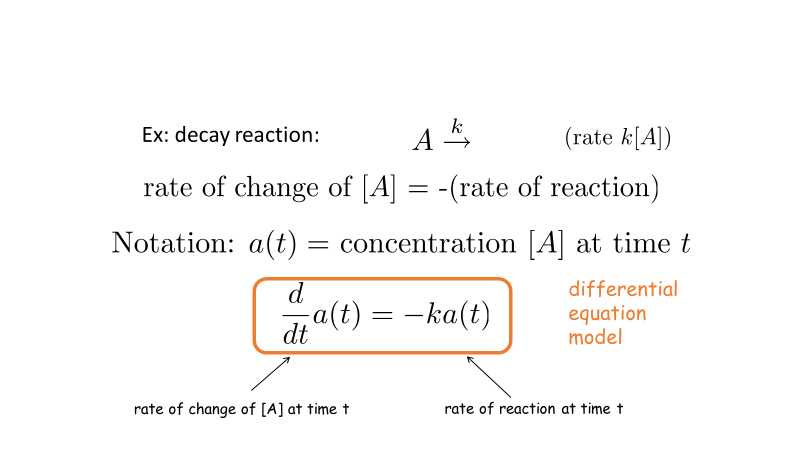

Where:
`k` is: **rate of decay**

Good to mention, the differential equation shows a minus sign because species `a` was consumed in this network.

In order to solve this equation, we first need to define the model as follows:


In [3]:
def model_S11(a,t):
    # k: rate of decay
    k = 1
    # diffrential equation
    dadt = -k*a
    return dadt

**We should now define:**
1.  Initial concentration of Species `a` (assuming it is equal to one unit) 
2. time points: I created time points by using the `NumPy linspace` function (`np.linspace`). It creates a sequence of evenly spaced numbers.

In [4]:
# initial values
# Initial concentration of Species a
a0 = [1]
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,5,100)
# call odeint function
# y = odeint(model, y0, t)
result = odeint(model_S11,a0,t)
# The values of species a have been stored in : result[:,0]

Text(0, 0.5, 'concentration')

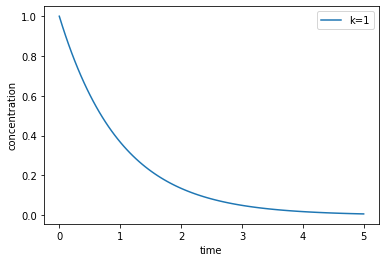

In [5]:
# plot
fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='k=1')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('concentration')

In [6]:
#slide 14 
def model_S13(y, t):
    # a, b, c, and d denote the concentrations of the corresponding species
    a = y[0]
    b = y[1]
    c = y[2]
    d = y[3]
    # The positive coefficients represent the production rate of species, while the negative coefficients represent the decay rate of species.
    dadt = 3 - 2*a - 2.5*a*b
    dbdt = 2*a - 2.5*a*b
    dcdt = 2.5*a*b - 3*c
    dddt = 2.5*a*b - 4*d
    dydt = [dadt,dbdt,dcdt,dddt]
    return dydt

In [7]:
# Initial concentration of Species a,b,c,d
y0 = [0,0,0,0]
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,5,100)
# call odeint function
# y = odeint(model, y0, t)
result = odeint(model_S13,y0,t)
# The values of species a have been stored in : result[:,0]
# The values of species b have been stored in : result[:,1]
# The values of species c have been stored in : result[:,2]
# The values of species d have been stored in : result[:,3]

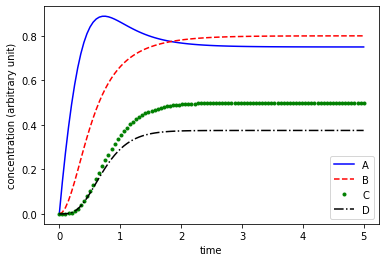

In [8]:
# plot results
plt.plot(t,result[:,0],'b-',label='A')
plt.plot(t,result[:,1],'r--',label='B')
plt.plot(t,result[:,2],'g.',label='C')
plt.plot(t,result[:,3],'k-.',label='D')
plt.ylabel('concentration (arbitrary unit)')
plt.xlabel('time')
plt.legend()
plt.show()

In [9]:
# additional example : no need to discuss in main hours of the class. 
# original model
def model_p35(y, t , k1 , k_N1, k2):
    # There are two processes acting here: the reversible conversion A ↔ B and the decay B → 
    # y[0] , y[1]: initial concentration of species a & b
    a = y[0]
    b = y[1]
    # k1: production rate of species B (also decay rate of species A)
    # k-1(k_N1): production rate of species A (also decay rate of species B)
    # k2: decay rate of species B
    dadt = -k1*a + k_N1 * b
    dbdt = k1*a - k_N1*b - k2*b
    dydt = [dadt,dbdt]
    return dydt

In [10]:
# initial values
# Initial concentration of Species a,b
y0 = [0,10]
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,3,100)
# There are two processes acting here: the reversible conversion A ↔ B and the decay B → 
# action 1: A → B: k1: production rate of species B (also decay rate of species A)
# action 2: B → A: k-1(k_N1): production rate of species A (also decay rate of species B)
# action 3: B → : k2: decay rate of species B
k1=9
k_N1 = 12
k2 = 2
# call odeint function
# y = odeint(model, y0, t)
result_model_p35 = odeint(model_p35,y0,t,args=(k1,k_N1,k2))
# The values of species a have been stored in : result_model_p35[:,0]
# The values of species b have been stored in : result_model_p35[:,1]

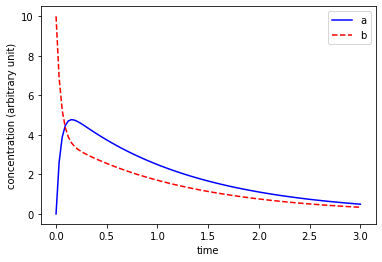

In [11]:
# plot results
plt.plot(t,result_model_p35[:,0],'b-',label='a')
plt.plot(t,result_model_p35[:,1],'r--',label='b')
plt.ylabel('concentration (arbitrary unit)')
plt.xlabel('time')
plt.legend()
plt.show()

In [12]:
# additional example (no need to discuss in the main hour)
# Matlab Code: http://www.math.uwaterloo.ca/~bingalls/MMSB/Code/matlab/rapid_equilibrium_approximation1.m
def model_p37(c, t):
    # reduced model
    # k1: production rate of species B (also decay rate of species A)
    # k-1(k_N1): production rate of species A (also decay rate of species B)
    # k2: decay rate of species B
    k1=9
    k_N1 = 12
    k2 = 2
    # To find out how this equation is derived from previous equations (model_p35()), see page 37
    # ˜c(t) = ˜a(t) +˜b(t)
    dcdt = -k2*(k1/(k_N1 + k1)) * c
    return dcdt

In [13]:
# Initial concentration of Species c
c0 = 10
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,3,100)
# call odeint function
# y = odeint(model, y0, t)
result_model_p37 = odeint(model_p37,c0,t)
# The values of species c have been stored in : result_model_p37[:,0]

In [14]:
# See page 37 for how these equations are derived from the species C equation.
a_tilde_p37 = (k_N1/(k_N1+k1))*result_model_p37[:,0]
b_tilde_p37 = (k1/(k_N1+k1))*result_model_p37[:,0]

In [15]:
#original model
# initial values
# Initial concentration of Species a & b
y0 = [0,10]
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,3,100)
# call odeint function
# y = odeint(model, y0, t)
result_model_original = odeint(model_p35,y0,t,args=(k1,k_N1,k2))
# The values of species a have been stored in : result_model_original[:,0]
# The values of species b have been stored in : result_model_original[:,1]

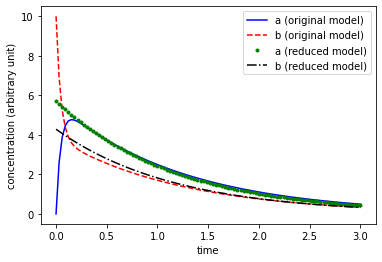

In [16]:
# plot results
plt.plot(t,result_model_original[:,0],'b-',label='a (original model)')
plt.plot(t,result_model_original[:,1],'r--',label='b (original model)')
plt.plot(t,a_tilde_p37,'g.',label='a (reduced model)')
plt.plot(t,b_tilde_p37,'k-.',label='b (reduced model)')
plt.ylabel('concentration (arbitrary unit)')
plt.xlabel('time')
plt.legend()
plt.show()

In [17]:
# Matlab Code: http://www.math.uwaterloo.ca/~bingalls/MMSB/Code/matlab/rapid_equilibrium_approximation2.m
# page 39
def model_p39(c, t , k0 , k1 , k_N1, k2):
    # reduced model
    # To find out how this equation is derived from original model equations, see page 39
    dcdt = k0-(k2*k1)/(k_N1+k1)*c
    return dcdt

In [18]:
# initial values
# Initial concentration of Species c
c0 = 12
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,3,100)
# There are three processes acting here: the reversible conversion A ↔ B, the decay B → and the production → A 
# action 1:  → A: k0: production rate of species A
# action 2: A → B: k1: production rate of species B (also decay rate of species A)
# action 3: B → A: k-1(k_N1): production rate of species A (also decay rate of species B)
# action 4: B → : k2: decay rate of species B
k0 = 5
k1=20
k_N1 = 12
k2 = 2
# call odeint function
# y = odeint(model, y0, t)
result_model_p39 = odeint(model_p39,c0,t,args=(k0,k1,k_N1,k2))
# The values of species c have been stored in : result_model_p39[:,0]

In [19]:
# See page 39 & 40 of the book to know how these equations are derived from species C equation.
a_tilde_p39 = (k_N1/(k_N1+k1))*result_model_p39[:,0]
b_tilde_p39 = (k1/(k_N1+k1))*result_model_p39[:,0]

In [20]:
# additional example : original model
# Useful for: model_p39
def model_original_p39(y, t):
    # There are three processes acting here: the reversible conversion A ↔ B, the decay B → and the production  → A 
    # y[0] , y[1]: initial concentration of species a & b
    a = y[0]
    b = y[1]
    # k0: production rate of species A
    # k1: production rate of species B (also decay rate of species A)
    # k-1(k_N1): production rate of species A (also decay rate of species B)
    # k2: decay rate of species B
    k0 = 5
    k1=20
    k_N1 = 12
    k2 = 2
    # diffrential equations
    dadt = k0-k1*a + k_N1 * b
    dbdt = k1*a - k_N1*b - k2*b
    dydt = [dadt,dbdt]
    return dydt

In [21]:
# initial values
# Initial concentration of Species a & b
y0 = [8,4]
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,3,100)
# call odeint function
# y = odeint(model, y0, t)
result_model_original_p39 = odeint(model_original_p39,y0,t)
# The values of species a have been stored in : result_model_original_p39[:,0]
# The values of species b have been stored in : result_model_original_p39[:,0]

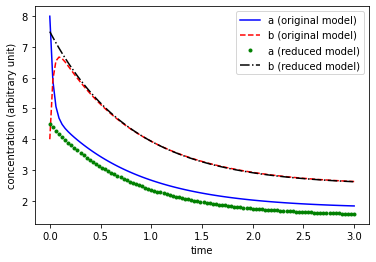

In [22]:
# plot results
plt.plot(t,result_model_original_p39[:,0],'b-',label='a (original model)')
plt.plot(t,result_model_original_p39[:,1],'r--',label='b (original model)')
plt.plot(t,a_tilde_p39,'g.',label='a (reduced model)')
plt.plot(t,b_tilde_p39,'k-.',label='b (reduced model)')
plt.ylabel('concentration (arbitrary unit)')
plt.xlabel('time')
plt.legend()
plt.show()

In [23]:
# Matlab Code: http://www.math.uwaterloo.ca/~bingalls/MMSB/Code/matlab/quasi_steady_state_approximation.m
# page 41
def model_p41(b, t):
    # k0: production rate of species A
    # k2: decay rate of species B
    k0 = 5
    k2 = 2
    # reduced model
    # To find out how this equation is derived from original model equations, see page 41
    dbdt = k0-k2*b
    return dbdt

In [24]:
# Initial concentration of Species b
b0 = 235/32
# time points
# np.linspace(starting value of the sequence, end value of the sequence, Number of samples to generate)
t = np.linspace(0,4,100)
# call odeint function
# y = odeint(model, y0, t)
result_model_p41 = odeint(model_p41,b0,t)
# The values of species b have been stored in : result_model_original_p41[:,0]

In [25]:
# k0: production rate of species A
# k-1(k_N1): production rate of species A (also decay rate of species B)
# k1: production rate of species B (also decay rate of species A)    
k0 = 5
k_N1 = 12
k1 = 20
# See page 49 , 41 for how this equation is derived from the species b equation.
a_tild_p41 = (k0+ k_N1*result_model_p41[:,0])/k1

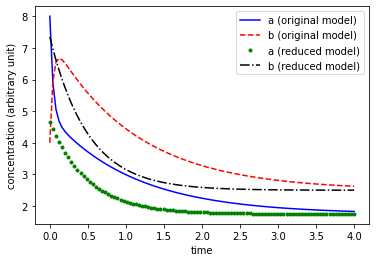

In [26]:
# plot results
plt.plot(t,result_model_original_p39[:,0],'b-',label='a (original model)')
plt.plot(t,result_model_original_p39[:,1],'r--',label='b (original model)')
plt.plot(t,a_tild_p41,'g.',label='a (reduced model)')
plt.plot(t,result_model_p41[:,0],'k-.',label='b (reduced model)')
plt.ylabel('concentration (arbitrary unit)')
plt.xlabel('time')
plt.legend()
plt.show()